In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd
import datetime

Objectif : analyser les performances de Loïc Badé, nouveau défenseur central du Stade Rennais pour remplacer Damien Da Silva, parti libre. Pour ce faire, on procède à une comparaison de ces performances par rapport à la charnière rennaise de la saison précédente ainsi qu'à deux défenseurs centraux de référence en Ligue 1 : Marquinhos et William Saliba. Toutes les statistiques utilisées ici ont été collectées sur fbref.com, qui récupère les données de StatsBomb.

### Import des données

In [4]:
df = pd.read_csv('Ligue1_Def.csv', sep = ",")
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
index_names = df[df['90s']<5].index
df.drop(index_names,inplace=True)
df.head(10)

,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Tkl_Def3rd,...,Press_Mid3rd,Press_Att3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
1,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,32.1,2.21,1.40,1.59,...,3.43,0.53,1.59,0.62,0.06,0.97,1.74,3.96,5.30,0.00
2,Mehdi Abeid,dz ALG,MF,Nantes,27,1992,14.7,2.52,1.63,1.09,...,9.05,2.52,1.22,0.14,0.00,1.09,1.56,4.08,0.95,0.07
3,Laurent Abergel,fr FRA,MF,Lorient,27,1993,32.9,4.86,3.28,1.98,...,16.40,2.92,1.55,0.18,0.03,1.37,1.40,6.26,0.40,0.00
4,Charles Abi,fr FRA,FWMF,Saint-Étienne,20,2000,10.1,0.69,0.40,0.59,...,10.50,9.31,0.69,0.10,0.00,0.59,0.69,1.39,0.59,0.00
6,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,24,1995,14.0,1.57,0.79,1.14,...,2.07,0.36,1.14,0.36,0.00,0.79,2.29,3.86,10.10,0.14
7,Yacine Adli,fr FRA,MF,Bordeaux,20,2000,26.9,3.38,2.30,1.45,...,13.30,4.72,1.34,0.15,0.00,1.19,1.52,4.91,0.89,0.07
8,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,35.0,1.57,1.06,1.17,...,2.89,0.29,1.23,0.69,0.00,0.54,1.11,2.69,5.17,0.03
9,Ruben Aguilar,fr FRA,DFFW,Monaco,27,1993,24.7,3.40,1.94,1.58,...,6.80,3.89,1.54,0.08,0.00,1.46,1.50,4.90,2.19,0.04
10,Matteo Ahlinvi,bj BEN,MF,Nîmes,21,1999,10.0,3.00,1.90,1.70,...,13.30,3.60,1.30,0.20,0.00,1.10,0.40,3.40,0.90,0.00
12,Jean-Eudes Aholou,ci CIV,MF,Strasbourg,26,1994,23.8,2.31,1.47,0.80,...,9.71,1.89,1.09,0.21,0.00,0.88,2.27,4.58,1.72,0.04


In [5]:
Def_def = df.Pos == "DF"
Def_def = df[Def_def]
Aguerd_def = Def_def[Def_def.Player=="Nayef Aguerd"]
Bade_def = Def_def[Def_def.Player=="Loïc Bade"]
DaSilva_def = Def_def[Def_def.Player=="Damien Da Silva"]
Marquinhos_def = Def_def[Def_def.Player=="Marquinhos"]
Saliba_def = Def_def[Def_def.Player=="William Saliba"]

### Performances défensives

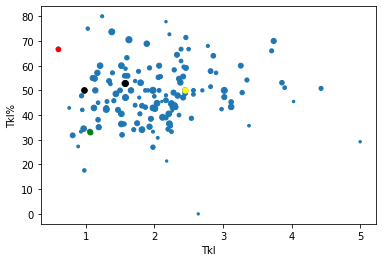

In [4]:
graphe_Tkl = Def_def.plot.scatter("Tkl","Tkl%",s=Def_def["90s"])
Aguerd_def.plot.scatter("Tkl","Tkl%",s=Aguerd_def["90s"],color='black',ax=graphe_Tkl)
Bade_def.plot.scatter("Tkl","Tkl%",s=Bade_def["90s"],color='yellow',ax=graphe_Tkl)
DaSilva_def.plot.scatter("Tkl","Tkl%",s=DaSilva_def["90s"],color='black',ax=graphe_Tkl)
Marquinhos_def.plot.scatter("Tkl","Tkl%",s=Marquinhos_def["90s"],color='green',ax=graphe_Tkl)
Saliba_def.plot.scatter("Tkl","Tkl%",s=Saliba_def["90s"],color='red',ax=graphe_Tkl)

Saliba surperforme les autres défenseurs avec un taux de réussite de tacles élevé et peu de tacles par match, ce qui représente sa capacité à défendre debout sans se jeter. Les performances de Marquinhos sont plutôt inférieures à celles de la plupart des défenseurs, ce qui est à noter. La paire rennais de la saison passée semble défendre plutôt sans se jeter aussi, alors que Badé tacle plus souvent, avec un taux de réussite assez banal. 

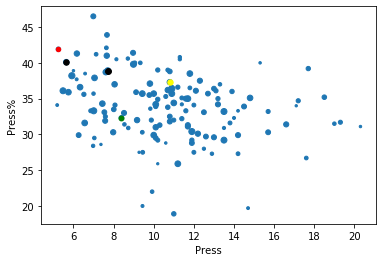

In [5]:
graphe_Press = Def_def.plot.scatter("Press","Press%",s=Def_def["90s"])
Aguerd_def.plot.scatter("Press","Press%",s=Aguerd_def["90s"],color='black',ax=graphe_Press)
Bade_def.plot.scatter("Press","Press%",s=Bade_def["90s"],color='yellow',ax=graphe_Press)
DaSilva_def.plot.scatter("Press","Press%",s=DaSilva_def["90s"],color='black',ax=graphe_Press)
Marquinhos_def.plot.scatter("Press","Press%",s=Marquinhos_def["90s"],color='green',ax=graphe_Press)
Saliba_def.plot.scatter("Press","Press%",s=Saliba_def["90s"],color='red',ax=graphe_Press)

Badé confirme sa propension à être plus agressif que les autres défenseurs centraux de cette comparaison avec un nombre de pressions relativement plus important, mais également avec un taux de réussite plus faible que les autres défenseurs. Ces prises de risque défensives pourraient s'expliquer par son rôle dans une défense à trois au RC Lens, qui lui permet de ne pas être le dernier rempart de son équipe et donc d'être plus agressif, de prendre plus de risques en défense.

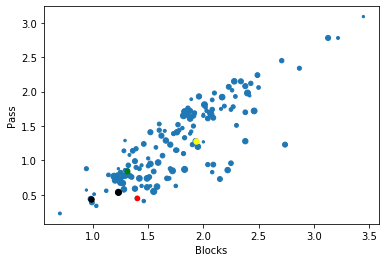

In [6]:
graphe_Block = Def_def.plot.scatter("Blocks","Pass",s=Def_def["90s"])
Aguerd_def.plot.scatter("Blocks","Pass",s=Aguerd_def["90s"],color='black',ax=graphe_Block)
Bade_def.plot.scatter("Blocks","Pass",s=Bade_def["90s"],color='yellow',ax=graphe_Block)
DaSilva_def.plot.scatter("Blocks","Pass",s=DaSilva_def["90s"],color='black',ax=graphe_Block)
Marquinhos_def.plot.scatter("Blocks","Pass",s=Marquinhos_def["90s"],color='green',ax=graphe_Block)
Saliba_def.plot.scatter("Blocks","Pass",s=Saliba_def["90s"],color='red',ax=graphe_Block)

Badé compare ici très positivement par rapport à ses concurrents, avec davantage de ballons bloqués, notamment sur des passes. Cela confirme son rôle proactif en défense entrevu à travers les graphiques précédents, et cela démontre une capacité certaine à couper les lignes de passes vers l'avant de l'adversaire. Cependant, il est impossible de conclure sans avoir une idée du nombre de fois où il a été éliminé par une passe, comparé aux autres centraux que nous comparons ici. 

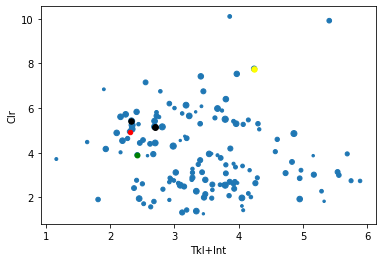

In [7]:
graphe_Autres = Def_def.plot.scatter("Tkl+Int","Clr",s=Def_def["90s"])
Aguerd_def.plot.scatter("Tkl+Int","Clr",s=Aguerd_def["90s"],color='black',ax=graphe_Autres)
Bade_def.plot.scatter("Tkl+Int","Clr",s=Bade_def["90s"],color='yellow',ax=graphe_Autres)
DaSilva_def.plot.scatter("Tkl+Int","Clr",s=DaSilva_def["90s"],color='black',ax=graphe_Autres)
Marquinhos_def.plot.scatter("Tkl+Int","Clr",s=Marquinhos_def["90s"],color='green',ax=graphe_Autres)
Saliba_def.plot.scatter("Tkl+Int","Clr",s=Saliba_def["90s"],color='red',ax=graphe_Autres)

Ici, les statistiques de Badé sont très impressionnantes : il se situe tout en haut du panier des défenseurs centraux à la fois en ce qui concerne les tacles effectués et les interceptions, et à la fois au niveau des dégagements effectués. Cela suggère un nombre de ballons récupérés par match élevé.

<AxesSubplot:xlabel='90s', ylabel='Err'>

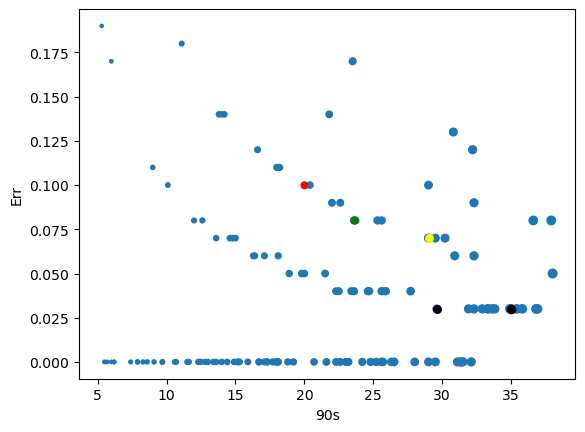

In [6]:
graphe_Autres2 = Def_def.plot.scatter("90s","Err",s=Def_def["90s"])
Aguerd_def.plot.scatter("90s","Err",s=Aguerd_def["90s"],color='black',ax=graphe_Autres2)
Bade_def.plot.scatter("90s","Err",s=Bade_def["90s"],color='yellow',ax=graphe_Autres2)
DaSilva_def.plot.scatter("90s","Err",s=DaSilva_def["90s"],color='black',ax=graphe_Autres2)
Marquinhos_def.plot.scatter("90s","Err",s=Marquinhos_def["90s"],color='green',ax=graphe_Autres2)
Saliba_def.plot.scatter("90s","Err",s=Saliba_def["90s"],color='red',ax=graphe_Autres2)

Au niveau des erreurs menant à un but, Badé est plutôt bien placé, même s'il semble commettre plus d'erreurs "graves" que la plus expérimentée paire rennaise. On remarque que, de manière assez étonnante, Marquinhos réalise plus d'erreurs que Da Silva, Aguerd et même Badé malgré un nombre de matches moins élevé.

### Jeu de passes

In [9]:
df2 = pd.read_csv('Ligue1_Pass.csv', sep = ",")
df2['Player'] = df2['Player'].str.split('\\',expand=True)[0]
index_names = df2[df2['90s']<5].index
df2.drop(index_names,inplace=True)
df2.head(10)

,Player,Nation,Pos,Squad,Age,Born,90s,Tot_Cmp,Tot_Att,Tot_Cmp%,...,Long_Att,Long_Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
1,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,32.1,46.9,53.4,87.8,...,11.40,73.0,0.00,0.01,-0.01,0.12,2.52,0.03,0.00,2.83
2,Mehdi Abeid,dz ALG,MF,Nantes,27,1992,14.7,41.9,49.3,85.0,...,10.50,66.9,0.00,0.05,-0.05,0.82,4.08,0.48,0.27,2.86
3,Laurent Abergel,fr FRA,MF,Lorient,27,1993,32.9,40.4,48.4,83.5,...,8.78,69.2,0.03,0.04,-0.01,0.64,3.43,0.52,0.12,3.37
4,Charles Abi,fr FRA,FWMF,Saint-Étienne,20,2000,10.1,14.3,21.2,67.3,...,1.98,30.0,0.20,0.03,0.17,0.79,0.89,0.50,0.00,1.09
6,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,24,1995,14.0,36.1,44.6,80.9,...,14.60,64.4,0.00,0.01,-0.01,0.21,2.14,0.14,0.00,2.21
7,Yacine Adli,fr FRA,MF,Bordeaux,20,2000,26.9,50.0,60.6,82.6,...,12.90,70.6,0.19,0.17,0.01,1.97,5.50,0.89,0.15,5.28
8,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,35.0,69.4,75.9,91.4,...,15.30,75.5,0.03,0.03,0.00,0.11,3.91,0.00,0.00,3.89
9,Ruben Aguilar,fr FRA,DFFW,Monaco,27,1993,24.7,53.3,64.7,82.4,...,8.66,56.5,0.12,0.19,-0.06,1.78,3.12,1.50,0.69,3.81
10,Matteo Ahlinvi,bj BEN,MF,Nîmes,21,1999,10.0,26.6,33.6,79.2,...,4.70,70.2,0.00,0.03,-0.03,0.40,1.60,0.20,0.00,1.60
12,Jean-Eudes Aholou,ci CIV,MF,Strasbourg,26,1994,23.8,29.7,35.3,84.1,...,5.38,72.7,0.08,0.05,0.03,0.29,2.82,0.29,0.00,2.31


In [10]:
Def_pass = df2.Pos == "DF"
Def_pass = df2[Def_pass]
Aguerd_pass = Def_pass[Def_pass.Player=="Nayef Aguerd"]
Bade_pass = Def_pass[Def_pass.Player=="Loïc Bade"]
DaSilva_pass = Def_pass[Def_pass.Player=="Damien Da Silva"]
Marquinhos_pass = Def_pass[Def_pass.Player=="Marquinhos"]
Saliba_pass = Def_pass[Def_pass.Player=="William Saliba"]

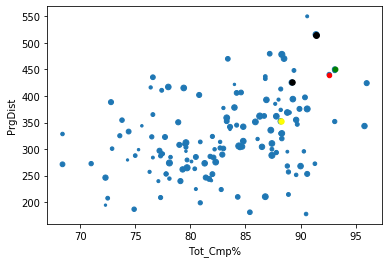

In [11]:
graphe_Pass = Def_pass.plot.scatter("Tot_Cmp%","PrgDist",s=Def_def["90s"])
Aguerd_pass.plot.scatter("Tot_Cmp%","PrgDist",s=Aguerd_def["90s"],color='black',ax=graphe_Pass)
Bade_pass.plot.scatter("Tot_Cmp%","PrgDist",s=Bade_def["90s"],color='yellow',ax=graphe_Pass)
DaSilva_pass.plot.scatter("Tot_Cmp%","PrgDist",s=DaSilva_def["90s"],color='black',ax=graphe_Pass)
Marquinhos_pass.plot.scatter("Tot_Cmp%","PrgDist",s=Marquinhos_def["90s"],color='green',ax=graphe_Pass)
Saliba_pass.plot.scatter("Tot_Cmp%","PrgDist",s=Saliba_def["90s"],color='red',ax=graphe_Pass)

Ce graphique est le premier sur lequel le niveau réel des quatre concurrents à Loïc Badé transparaît vraiment. En effet, ils font tous partie des tous meilleurs défenseurs centraux de Ligue 1 au niveau des distances gagnées par la passe et du pourcentage de passes réussies. Dans une équipe offensive qui aura la possession la plupart du temps en championnat, Badé devra progresser dans ce domaine pour se rendre utile, notamment face à des blocs bas. En effet, malgré le fait qu'il évolue dans une défense à trois, plus propice à la prise de risques par la passe, Badé est à la fois le moins précis et celui dont les passes permettent le moins de progression. Pour nuancer cette observation, on peut tout de même remarquer que Badé, pour sa première saison complète en professionnelle, se situe tout de même dans la bonne partie du graphique, et qu'à part William Saliba, les autres défenseurs auxquels on le compare évoluent dans des équipes dont la possession est beaucoup plus élevée que le RC Lens (51,1 % en moyenne sur la saison contre 59,1 % pour Rennes et 63,1 % pour Paris), ce qui facilite le fait de gagner des mètres par la passe.

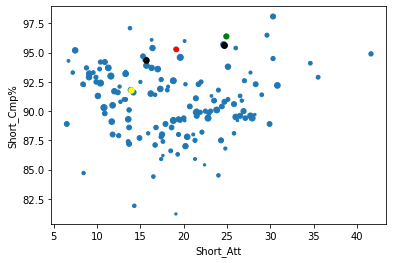

In [12]:
graphe_shortPass = Def_pass.plot.scatter("Short_Att","Short_Cmp%",s=Def_def["90s"])
Aguerd_pass.plot.scatter("Short_Att","Short_Cmp%",s=Aguerd_def["90s"],color='black',ax=graphe_shortPass)
Bade_pass.plot.scatter("Short_Att","Short_Cmp%",s=Bade_def["90s"],color='yellow',ax=graphe_shortPass)
DaSilva_pass.plot.scatter("Short_Att","Short_Cmp%",s=DaSilva_def["90s"],color='black',ax=graphe_shortPass)
Marquinhos_pass.plot.scatter("Short_Att","Short_Cmp%",s=Marquinhos_def["90s"],color='green',ax=graphe_shortPass)
Saliba_pass.plot.scatter("Short_Att","Short_Cmp%",s=Saliba_def["90s"],color='red',ax=graphe_shortPass)

Ce graphique concernant les passes courtes confirme le retard de Badé sur ses concurrents, même s'il reste dans la bonne partie du graphique.

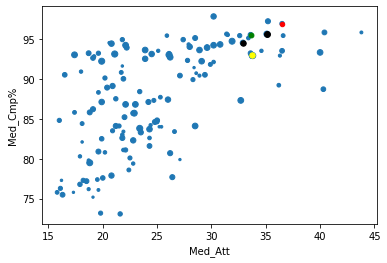

In [13]:
graphe_medPass = Def_pass.plot.scatter("Med_Att","Med_Cmp%",s=Def_def["90s"])
Aguerd_pass.plot.scatter("Med_Att","Med_Cmp%",s=Aguerd_def["90s"],color='black',ax=graphe_medPass)
Bade_pass.plot.scatter("Med_Att","Med_Cmp%",s=Bade_def["90s"],color='yellow',ax=graphe_medPass)
DaSilva_pass.plot.scatter("Med_Att","Med_Cmp%",s=DaSilva_def["90s"],color='black',ax=graphe_medPass)
Marquinhos_pass.plot.scatter("Med_Att","Med_Cmp%",s=Marquinhos_def["90s"],color='green',ax=graphe_medPass)
Saliba_pass.plot.scatter("Med_Att","Med_Cmp%",s=Saliba_def["90s"],color='red',ax=graphe_medPass)

Au niveau des passes de distance moyenne, Badé compare très bien avec ses concurrents. Il est difficile d'analyser ces performances sans pouvoir observer à la vidéo les passes en question. Ces passes de distance moyenne pourraient en effet autant correspondre à des transversales salvatrices pour échapper à la pression qu'à des passes en retrait au gardien.

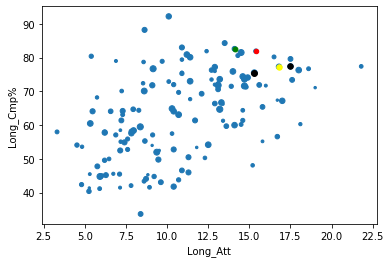

In [14]:
graphe_longPass = Def_pass.plot.scatter("Long_Att","Long_Cmp%",s=Def_def["90s"])
Aguerd_pass.plot.scatter("Long_Att","Long_Cmp%",s=Aguerd_def["90s"],color='black',ax=graphe_longPass)
Bade_pass.plot.scatter("Long_Att","Long_Cmp%",s=Bade_def["90s"],color='yellow',ax=graphe_longPass)
DaSilva_pass.plot.scatter("Long_Att","Long_Cmp%",s=DaSilva_def["90s"],color='black',ax=graphe_longPass)
Marquinhos_pass.plot.scatter("Long_Att","Long_Cmp%",s=Marquinhos_def["90s"],color='green',ax=graphe_longPass)
Saliba_pass.plot.scatter("Long_Att","Long_Cmp%",s=Saliba_def["90s"],color='red',ax=graphe_longPass)

On observe des performances similaires sur les passes longues que sur les passes de distance moyenne, suggérant tout de même une qualité technique impressionnante pour son âge et une audace permettant de changer le jeu de manière fiable, grâce à une vision du jeu déjà bien développée. Une nouvelle fois, il faudrait pouvoir observer les passes en question pour tirer des conclusions plus pertinentes, mais ces statistiques sont très prometteuses. En particulier, elles pourraient faire espérer une marge de progression importante sur les passes progressives que nous avons évoquées plus tôt. 

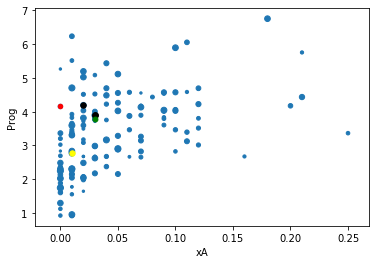

In [15]:
graphe_usefulPass = Def_pass.plot.scatter("xA","Prog",s=Def_def["90s"])
Aguerd_pass.plot.scatter("xA","Prog",color='black',s=Aguerd_def["90s"],ax=graphe_usefulPass)
Bade_pass.plot.scatter("xA","Prog",color='yellow',s=Bade_def["90s"],ax=graphe_usefulPass)
DaSilva_pass.plot.scatter("xA","Prog",color='black',s=DaSilva_def["90s"],ax=graphe_usefulPass)
Marquinhos_pass.plot.scatter("xA","Prog",color='green',s=Marquinhos_def["90s"],ax=graphe_usefulPass)
Saliba_pass.plot.scatter("xA","Prog",color='red',s=Saliba_def["90s"],ax=graphe_usefulPass)

La stat d'xA pour un défenseur central est loin d'être primordiale mais la stat de passes progressives peut avoir une importance, particulièrement dans une défense à trois ou dans une équipe à forte possession de balle. Damien Da Silva et Nayef Aguerd illustrent bien cette nécessité de gagner de précieux mètres dans le camp adverse avec une stat en passes progressives assez élevée. Loïc Badé est ici encore une fois assez distancé. 

In [16]:
df3 = pd.read_csv('Ligue1_PassType.csv', sep = ",")
df3['Player'] = df3['Player'].str.split('\\',expand=True)[0]
index_names = df3[df3['90s']<5].index
df3.drop(index_names,inplace=True)
df3.head(10)

,Player,Nation,Pos,Squad,Age,Born,90s,Att,Live,Dead,...,Left,Right,Head,TI,Other,Cmp,Off,Out,Int,Blocks
1,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,32.1,53.4,51.6,1.84,...,35.40,14.80,1.78,0.00,0.09,46.9,0.12,0.81,0.75,0.40
2,Mehdi Abeid,dz ALG,MF,Nantes,27,1992,14.7,49.3,46.0,3.33,...,6.80,40.10,1.29,0.20,0.27,41.9,0.34,1.02,0.68,0.48
3,Laurent Abergel,fr FRA,MF,Lorient,27,1993,32.9,48.4,47.0,1.40,...,4.16,42.30,1.37,0.21,0.15,40.4,0.15,0.85,1.52,0.85
4,Charles Abi,fr FRA,FWMF,Saint-Étienne,20,2000,10.1,21.2,19.7,1.49,...,14.10,2.57,1.58,0.00,0.30,14.3,0.00,0.69,0.10,1.39
6,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,24,1995,14.0,44.6,42.7,1.86,...,13.60,27.60,2.14,0.14,0.00,36.1,0.00,1.07,0.36,0.21
7,Yacine Adli,fr FRA,MF,Bordeaux,20,2000,26.9,60.6,58.3,2.23,...,5.02,53.30,1.15,0.15,0.19,50.0,0.22,1.00,1.60,1.34
8,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,35.0,75.9,73.9,2.06,...,64.70,7.60,1.97,0.03,0.14,69.4,0.03,0.63,0.43,0.26
9,Ruben Aguilar,fr FRA,DFFW,Monaco,27,1993,24.7,64.7,55.6,9.11,...,1.34,52.80,2.19,6.92,0.20,53.3,0.20,0.65,0.97,1.26
10,Matteo Ahlinvi,bj BEN,MF,Nîmes,21,1999,10.0,33.6,32.8,0.80,...,26.10,5.60,1.30,0.00,0.20,26.6,0.10,1.60,0.80,1.20
12,Jean-Eudes Aholou,ci CIV,MF,Strasbourg,26,1994,23.8,35.3,34.7,0.55,...,27.00,5.42,1.55,0.08,0.13,29.7,0.08,0.71,0.71,0.59


#### Comportement en possession

In [19]:
df4 = pd.read_csv('Ligue1_Poss.csv', sep = ",")
df4['Player'] = df4['Player'].str.split('\\',expand=True)[0]
index_names = df4[df4['90s']<5].index
df4.drop(index_names,inplace=True)
df4.head(10)

,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Def_Pen,Def_3rd,...,PrgDist,Carr_Prog,Third,CPA,Mis,Dis,Targ,Rec,Rec%,Rec_Prog
1,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,32.1,65.0,8.69,37.50,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Mehdi Abeid,dz ALG,MF,Nantes,27,1992,14.7,59.3,1.77,15.20,...,114.9,4.08,1.50,0.07,0.41,1.22,42.7,38.4,90.0,0.95
3,Laurent Abergel,fr FRA,MF,Lorient,27,1993,32.9,60.0,1.22,15.60,...,87.9,3.25,1.03,0.09,1.25,1.40,43.4,40.2,92.6,1.43
4,Charles Abi,fr FRA,FWMF,Saint-Étienne,20,2000,10.1,34.2,0.89,4.06,...,49.9,2.67,1.09,0.40,3.47,2.48,48.7,25.0,51.4,6.53
6,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,24,1995,14.0,61.1,10.10,37.00,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
7,Yacine Adli,fr FRA,MF,Bordeaux,20,2000,26.9,72.2,2.04,15.60,...,146.0,5.80,1.75,0.26,1.23,1.60,58.0,53.8,92.9,1.23
8,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,35.0,86.3,8.60,38.50,...,154.0,3.43,0.31,0.00,0.11,0.29,65.7,64.7,98.6,0.17
9,Ruben Aguilar,fr FRA,DFFW,Monaco,27,1993,24.7,77.3,2.27,16.20,...,137.4,6.80,2.19,0.20,1.21,1.09,57.6,48.6,84.3,5.06
10,Matteo Ahlinvi,bj BEN,MF,Nîmes,21,1999,10.0,46.4,1.60,12.60,...,133.5,4.40,1.10,0.20,2.10,1.80,37.5,31.9,85.1,2.20
12,Jean-Eudes Aholou,ci CIV,MF,Strasbourg,26,1994,23.8,46.4,2.14,10.60,...,73.3,2.69,1.18,0.08,1.05,0.97,31.9,28.0,87.6,1.22


In [20]:
Def_poss = df4.Pos == "DF"
Def_poss = df4[Def_poss]
Aguerd_poss = Def_poss[Def_poss.Player=="Nayef Aguerd"]
Bade_poss = Def_poss[Def_poss.Player=="Loïc Bade"]
DaSilva_poss = Def_poss[Def_poss.Player=="Damien Da Silva"]
Marquinhos_poss = Def_poss[Def_poss.Player=="Marquinhos"]
Saliba_poss = Def_poss[Def_poss.Player=="William Saliba"]

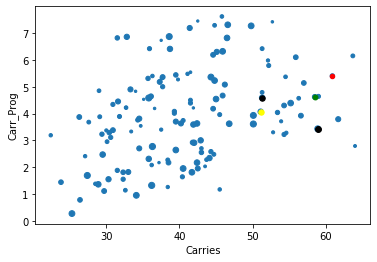

In [22]:
graphe_Carries = Def_poss.plot.scatter("Carries","Carr_Prog",s=Def_def["90s"])
Aguerd_poss.plot.scatter("Carries","Carr_Prog",s=Aguerd_def["90s"],color='black',ax=graphe_Carries)
Bade_poss.plot.scatter("Carries","Carr_Prog",s=Bade_def["90s"],color='yellow',ax=graphe_Carries)
DaSilva_poss.plot.scatter("Carries","Carr_Prog",s=DaSilva_def["90s"],color='black',ax=graphe_Carries)
Marquinhos_poss.plot.scatter("Carries","Carr_Prog",s=Marquinhos_def["90s"],color='green',ax=graphe_Carries)
Saliba_poss.plot.scatter("Carries","Carr_Prog",s=Saliba_def["90s"],color='red',ax=graphe_Carries)

Badé démontre ici son aptitude à porter la balle vers l'avant. Il est encore légèrement en retrait de ses concurrents, mais cela peut probablement s'expliquer en partie par son jeune âge et par le fait qu'il s'agisse de sa première véritable saison professionnelle. Ce graphique est donc plutôt très encourageant. Soit dit en passant, on remarque la performance de William Saliba qui, bien qu'il soit également très jeune, fait déjà partie des joueurs les plus matures de Ligue 1 balle au pied. 

### Autres statistiques intéressantes

In [11]:
df5 = pd.read_csv('Ligue1_Misc.csv', sep = ",")
df5['Player'] = df5['Player'].str.split('\\',expand=True)[0]
index_names = df5[df5['90s']<5].index
df5.drop(index_names,inplace=True)
df5.head(10)

,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,2CrdY,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
1,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,32.1,0.12,0.03,0.0,...,0.00,1.74,1.40,0.00,0.00,0.0,9.00,2.90,1.53,65.5
2,Mehdi Abeid,dz ALG,MF,Nantes,27,1992,14.7,0.34,0.00,0.0,...,1.43,1.56,1.63,0.00,0.00,0.0,9.93,0.82,1.29,38.7
3,Laurent Abergel,fr FRA,MF,Lorient,27,1993,32.9,0.15,0.00,0.0,...,0.55,1.40,3.28,0.03,0.00,0.0,9.06,0.24,0.58,29.6
4,Charles Abi,fr FRA,FWMF,Saint-Étienne,20,2000,10.1,0.10,0.00,0.0,...,0.40,0.69,0.40,0.00,0.00,0.0,3.96,3.56,6.14,36.7
6,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,24,1995,14.0,0.07,0.00,0.0,...,0.07,2.29,0.79,0.00,0.00,0.0,9.07,4.07,1.07,79.2
7,Yacine Adli,fr FRA,MF,Bordeaux,20,2000,26.9,0.22,0.00,0.0,...,1.12,1.52,2.30,0.00,0.00,0.0,8.03,1.12,0.93,54.5
8,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,35.0,0.17,0.00,0.0,...,0.03,1.11,1.06,0.00,0.03,0.0,9.46,3.66,1.63,69.2
9,Ruben Aguilar,fr FRA,DFFW,Monaco,27,1993,24.7,0.24,0.00,0.0,...,4.05,1.50,1.94,0.04,0.00,0.0,10.20,2.02,1.54,56.8
10,Matteo Ahlinvi,bj BEN,MF,Nîmes,21,1999,10.0,0.00,0.00,0.0,...,0.40,0.40,1.90,0.00,0.10,0.0,6.70,0.50,1.10,31.3
12,Jean-Eudes Aholou,ci CIV,MF,Strasbourg,26,1994,23.8,0.38,0.00,0.0,...,0.21,2.27,1.47,0.00,0.00,0.0,9.96,1.81,1.26,58.9


In [12]:
Def_misc = df5.Pos == "DF"
Def_misc = df5[Def_misc]
Def_misc.head(10)
Aguerd_misc = Def_misc[Def_misc.Player=="Nayef Aguerd"]
Bade_misc = Def_misc[Def_misc.Player=="Loïc Bade"]
DaSilva_misc = Def_misc[Def_misc.Player=="Damien Da Silva"]
Marquinhos_misc = Def_misc[Def_misc.Player=="Marquinhos"]
Saliba_misc = Def_misc[Def_misc.Player=="William Saliba"]

<AxesSubplot:xlabel='CrdY', ylabel='CrdR'>

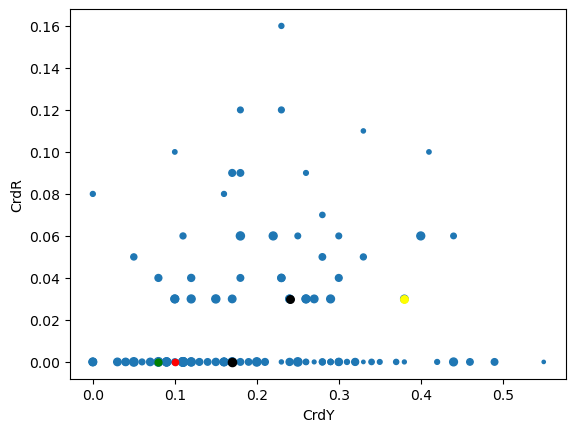

In [14]:
graphe_Cartons = Def_misc.plot.scatter("CrdY","CrdR",s=Def_misc["90s"])
Aguerd_misc.plot.scatter("CrdY","CrdR",s=Aguerd_misc["90s"],color='black',ax=graphe_Cartons)
Bade_misc.plot.scatter("CrdY","CrdR",s=Bade_misc["90s"],color='yellow',ax=graphe_Cartons)
DaSilva_misc.plot.scatter("CrdY","CrdR",s=DaSilva_misc["90s"],color='black',ax=graphe_Cartons)
Marquinhos_misc.plot.scatter("CrdY","CrdR",s=Marquinhos_misc["90s"],color='green',ax=graphe_Cartons)
Saliba_misc.plot.scatter("CrdY","CrdR",s=Saliba_misc["90s"],color='red',ax=graphe_Cartons)

Badé semble être très souvent sanctionné par les arbitres, ce qui est certes un défaut récurrent chez les jeunes joueurs inexpérimentés, mais qui pourrait coûter des matches importants au Stade Rennais s'il n'est pas rapidement gommé. Cela ternit en partie le tableau dressé plus haut qui soulignait son aggressivité.

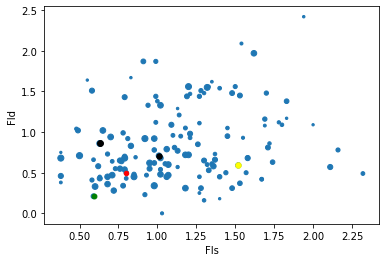

In [27]:
graphe_Fautes = Def_misc.plot.scatter("Fls","Fld",s=Def_misc["90s"])
Aguerd_misc.plot.scatter("Fls","Fld",s=Aguerd_misc["90s"],color='black',ax=graphe_Fautes)
Bade_misc.plot.scatter("Fls","Fld",s=Bade_misc["90s"],color='yellow',ax=graphe_Fautes)
DaSilva_misc.plot.scatter("Fls","Fld",s=DaSilva_misc["90s"],color='black',ax=graphe_Fautes)
Marquinhos_misc.plot.scatter("Fls","Fld",s=Marquinhos_misc["90s"],color='green',ax=graphe_Fautes)
Saliba_misc.plot.scatter("Fls","Fld",s=Saliba_misc["90s"],color='red',ax=graphe_Fautes)

Ce graphique confirme nos premières impressions sur Loïc Badé, qui semble être un jeune joueur qui a encore du mal à faire la part des choses entre aggressivité positive sur le porteur et aggressivité négative qui provoque des fautes, potentiellement aboutissant à des coups de pied arrêtés dangereux pour son équipe ou à des cartons pénalisants.

<AxesSubplot:xlabel='PKcon', ylabel='OG'>

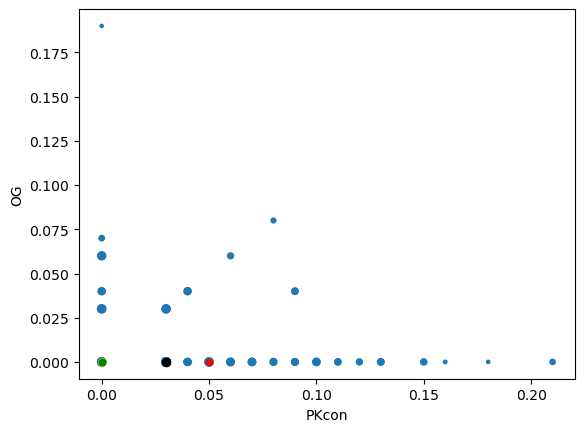

In [15]:
graphe_Conc = Def_misc.plot.scatter("PKcon","OG",s=Def_misc["90s"])
Aguerd_misc.plot.scatter("PKcon","OG",s=Aguerd_misc["90s"],color='black',ax=graphe_Conc)
Bade_misc.plot.scatter("PKcon","OG",s=Bade_misc["90s"],color='yellow',ax=graphe_Conc)
DaSilva_misc.plot.scatter("PKcon","OG",s=DaSilva_misc["90s"],color='black',ax=graphe_Conc)
Marquinhos_misc.plot.scatter("PKcon","OG",s=Marquinhos_misc["90s"],color='green',ax=graphe_Conc)
Saliba_misc.plot.scatter("PKcon","OG",s=Saliba_misc["90s"],color='red',ax=graphe_Conc)

Comme suggéré par notre étude jusqu'ici, l'aggressivité de Badé peut le mener à offrir des opportunités concrètes de buts à l'adversaire. Toutefois, il serait injuste d'expliquer si simplement ce penalty, surtout sans regarder les images avant car il n'y a rien d'improbable à ce qu'un défenseur central provoque un penalty. Or, cette faute dans les dernières minutes de ce Lorient-Lens 2020 est effectivement : pris dans la profondeur par Yoane Wissa, Badé le pousse légèrement dans le dos. Une poussette suffisante pour que l'arbitre siffle penalty et offre l'opportunité à Lorient d'égaliser. Cette faute, qui sent clairement la manque d'expérience, n'en demeure pas moins un exemple de suraggressivité que Badé va devoir corriger pour ne pas mettre trop souvent son équipe dans des situations délicates. Par chance, Lens reprendra l'avantage quelques minutes plus tard, mais cette faute aurait pu, voire dû, coûter plus cher. A sa décharge, Wissa était quasiment déjà en situation de un contre un face à Leca, la probabilité qu'il marque étant donc déjà assez forte.

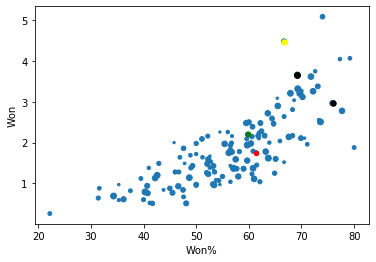

In [29]:
graphe_Tete = Def_misc.plot.scatter("Won%","Won",s=Def_misc["90s"])
Aguerd_misc.plot.scatter("Won%","Won",s=Aguerd_misc["90s"],color='black',ax=graphe_Tete)
Bade_misc.plot.scatter("Won%","Won",s=Bade_misc["90s"],color='yellow',ax=graphe_Tete)
DaSilva_misc.plot.scatter("Won%","Won",s=DaSilva_misc["90s"],color='black',ax=graphe_Tete)
Marquinhos_misc.plot.scatter("Won%","Won",s=Marquinhos_misc["90s"],color='green',ax=graphe_Tete)
Saliba_misc.plot.scatter("Won%","Won",s=Saliba_misc["90s"],color='red',ax=graphe_Tete)

On finit par une statistique très parlante sur les qualités de Loïc Badé : son jeu de tête. Il se situe en effet parmis les tous meilleurs défenseurs du championnat dans ce secteur, ce qui est encourageant dans l'optique de jouer dans une défense à deux, plus exposée aux duels aériens.

### Conclusion

Loïc Badé dispose de qualités certaines (passes moyennes et longues, aggressivité, excellent jeu de tête) qui, même si elles le font déjà figurer parmi les meilleurs défenseurs de Ligue 1 pour sa première saison professionnelle dans certains statistiques, ne peuvent toutefois pas permettre d'éclipser des défauts à gommer rapidement (manque d'influence de son jeu de passe et de ses possessions de balle, mais surtout un surplus d'aggressivité qui a dû coûter des points au RC Lens). Malgré son rôle a priori plus confortable dans une défense à trois, il ne semble pas créer de vrais différences balles au pied et n'est pas encore assez sûr dans ses interventions. En particulier, le gain pour une équipe comme le Stade Rennais est difficile à voir par rapport à des défenseurs comme Aguerd ou Da Silva, qui lui sont supérieurs dans la plupart des statistiques étudiées ici. Le principal argument en la faveur de Loïc Badé reste son jeune âge et la marge de progression qui en découle, puisqu'il est facile pour un jeune joueur inexpérimenté de se laisser déconcentrer ou dépasser par sa nervosité et ainsi de commettre des fautes évitables.
Finalement, toute cette étude n'est qu'une première approche statistique du joueur qu'est Loïc Badé, elle mériterait donc d'être complétée par une analyse vidéo qualitative permettant de reprendre les différents points abordés pour les vérifier et les approfondir. 